In [53]:
# import all necessary stuff
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np

In [54]:
# import and read in CSV
amazon_data_path = "Resources/Amazon_Data.csv"

amazon_data = pd.read_csv(amazon_data_path, delimiter=',', header=0)

In [55]:
# create starter data frame from CSV
amazon_df = pd.DataFrame(amazon_data)

amazon_df.head()

,Index,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,1,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2,2023/06/04 1:28:19 PM GMT+5:31,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,3,2023/06/04 1:28:19 PM GMT+5:32,24,Prefer not to say,Few times a month,"Groceries and Gourmet Food,Clothing and Fashion",No,Few times a month,Keyword,Multiple pages,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,4,2023/06/04 1:28:19 PM GMT+5:33,24,Female,Once a month,"Beauty and Personal Care,Clothing and Fashion,...",Sometimes,Few times a month,Keyword,First page,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,5,2023/06/04 1:28:19 PM GMT+5:34,22,Female,Less than once a month,"Beauty and Personal Care,Clothing and Fashion",Yes,Few times a month,Filter,Multiple pages,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [56]:
# rename columns
amazon_df = amazon_df.rename(columns={"Personalized_Recommendation_Frequency":"Recommendation_Frequency",
                              "Product_Search_Method":"Search_Method",
                              "Search_Result_Exploration":"Exploration",
                              "Saveforlater_Frequency":"Save_for_Later_Frequency",
                              "age":"Age"})
amazon_df.head()

# define variables as dictionaries or lists here
age = amazon_df["Age"]
print(age)

0      23
1      23
2      24
3      24
4      22
       ..
597    23
598    23
599    23
600    23
601    23
Name: Age, Length: 602, dtype: int64


In [57]:
# Question 1: Is there a strong correlation with age group and purchasing frequency on Amazon? – Maia

# group the ages and compare group sizes - population is skewed very young, maybe binning?









In [58]:
# Question 2: Investigate top factors for cart abandonment – Kyle










In [59]:
# Question 3: Review question – Eileen. Which type of consumer leaves the most reviews? The least?


#just a test!  







In [155]:
# Question 4: How do browsing frequency and purchase frequency compare? - Bridget 


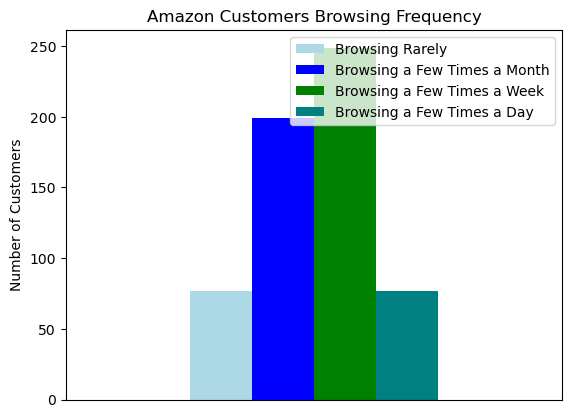

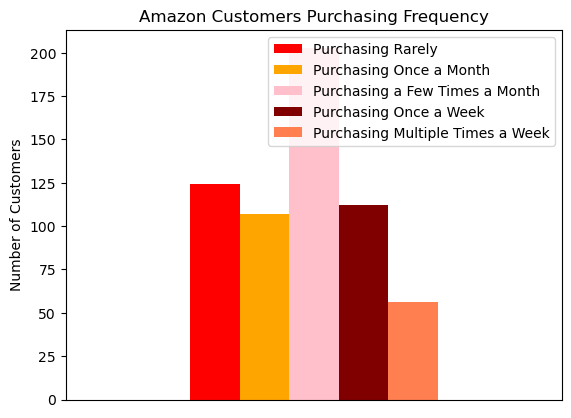

In [157]:
# Question 4: How do browsing frequency and purchase frequency compare? - Bridget 

# create a summary table for purchasing 
# count number of people for each category of browsing
browsing_rarely = amazon_df["Browsing_Frequency"].value_counts()["Rarely"]
browsing_few_monthly = amazon_df["Browsing_Frequency"].value_counts()["Few times a month"]
browsing_few_weekly = amazon_df["Browsing_Frequency"].value_counts()["Few times a week"]
browsing_daily = amazon_df["Browsing_Frequency"].value_counts()["Multiple times a day"]

# list for browsing
b_list = ["Rarely", "Few times a month", "Few times a week", "Multiple times a day"]
b_filter = [amazon_df["Browsing_Frequency"]== b for b in b_list]
b_counts = [amazon_df.loc[b, "Browsing_Frequency"].value_counts() for b in b_filter]

# create tiny data frame from all of these plots
browsing_dict = ({"Browsing Rarely":[browsing_rarely], 
                           "Browsing a Few Times a Month":[browsing_few_monthly], 
                           "Browsing a Few Times a Week":[browsing_few_weekly], 
                           "Browsing a Few Times a Day":[browsing_daily]})
# b_cols = (browsing_rarely, browsing_few_monthly, browsing_few_weekly, browsing_daily)                            
browsing_df = pd.DataFrame(browsing_dict)
browsing_df.rename(columns={0 :'Frequency of Browsing'}, inplace=True)
browsing_df

# create browsing bar plot
browsing_df.plot(kind = 'bar', color = ['lightblue', 'blue', 'green', 'teal'], xticks=None,  ylabel = 'Number of Customers', title = 'Amazon Customers Browsing Frequency')
plt.xticks([]) 

# save browsing plot elsewhere
plt.savefig("Output/BrowsingBar.png")

# do the same thing for purchasing
purchase_count = amazon_df["Purchase_Frequency"].value_counts()
purchase_rarely = amazon_df["Purchase_Frequency"].value_counts()["Less than once a month"]
purchase_once_monthly = amazon_df["Purchase_Frequency"].value_counts()["Once a month"]
purchase_few_monthly = amazon_df["Purchase_Frequency"].value_counts()["Few times a month"]
purchase_once_weekly = amazon_df["Purchase_Frequency"].value_counts()["Once a week"]
purchase_weekly = amazon_df["Purchase_Frequency"].value_counts()["Multiple times a week"]

# create tiny data frame from all of these plots
purchase_dict = ({"Purchasing Rarely":[purchase_rarely], 
                           "Purchasing Once a Month":[purchase_once_monthly], 
                           "Purchasing a Few Times a Month":[purchase_few_monthly], 
                           "Purchasing Once a Week":[purchase_once_weekly],
                           "Purchasing Multiple Times a Week":[purchase_weekly]})
                            
purchasing_df = pd.DataFrame(purchase_dict)
purchasing_df.rename(columns={0 :'Frequency of Purchasing'}, inplace=True)
purchasing_df

# create purchasing bar plot
purchasing_df.plot(kind = 'bar', color = ['red', 'orange', 'pink', 'maroon', 'coral'], xticks=None, ylabel = 'Number of Customers', title = 'Amazon Customers Purchasing Frequency')
plt.xticks([]) 

# save purchasing bar plot elsewhere
plt.savefig("Output/PurchasingBar.png")

In [158]:
purchasing_df

,Purchasing Rarely,Purchasing Once a Month,Purchasing a Few Times a Month,Purchasing Once a Week,Purchasing Multiple Times a Week
0,124,107,203,112,56


In [159]:
browsing_df

,Browsing Rarely,Browsing a Few Times a Month,Browsing a Few Times a Week,Browsing a Few Times a Day
0,77,199,249,77


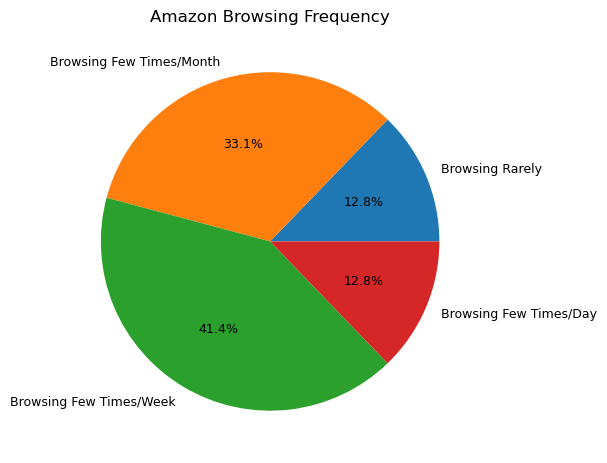

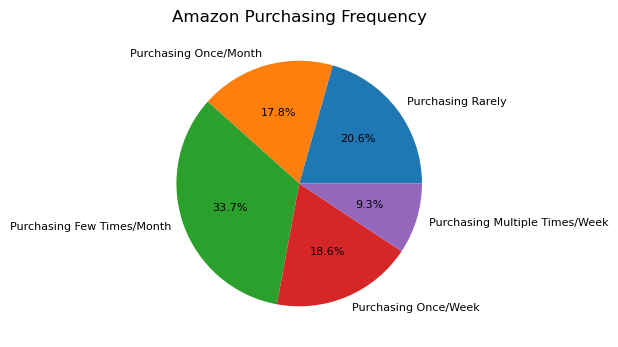

In [160]:
# count the percentages of each category for purchasing
x = [77, 199 , 249, 77]
labels = ['Browsing Rarely', 'Browsing Few Times/Month', 'Browsing Few Times/Week', 
                        'Browsing Few Times/Day']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%', textprops={'fontsize': 9})
ax.set_title('Amazon Browsing Frequency')
plt.tight_layout()

# export browsing pie
plt.savefig("Output/BrowsingPie.png")

# count the percentages of each category for purchasing
x = [124, 107 , 203, 112, 56]
labels = ['Purchasing Rarely', 'Purchasing Once/Month', 'Purchasing Few Times/Month', 
                        'Purchasing Once/Week', 'Purchasing Multiple Times/Week']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%', textprops={'fontsize': 8})
ax.set_title('Amazon Purchasing Frequency')
plt.tight_layout()

# export purchasing pie 
plt.savefig("Output/PurchasingPie.png")


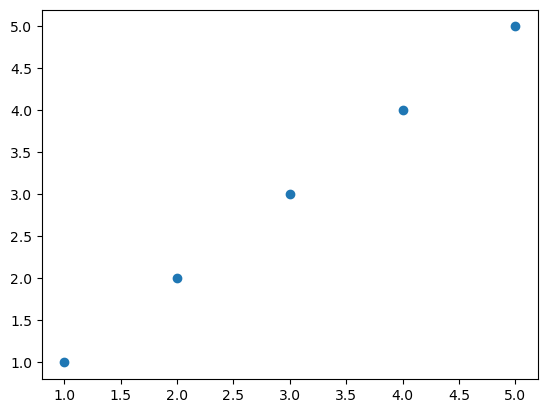

In [154]:
# Question 4: Is there a strong correlation between browsing frequency and purchase frequency? - Bridget 
# set quantitative measures
mapping_dict1 = {"Less than once a month": 1,
    "Once a month": 2,
    "Few times a month": 3,
    "Once a week": 4,
    "Multiple times a week": 5}

mapping_dict2 = {"Rarely": 1,
    "Few times a month": 2,
    "Few times a week": 4, 
    "Multiple times a day": 5}

# add quantitative columns for browsing and purchasing frequency
amazon_df["Purchase Frequency Mapped"] = amazon_df["Purchase_Frequency"].map(mapping_dict1)
amazon_df["Browsing Frequency Mapped"] = amazon_df["Browsing_Frequency"].map(mapping_dict2)
amazon_df.head()


# create a scatter plot for browsing frequency vs. purchase frequency with a linear regression
x_values = [1, 2, 3, 4, 5]
y_values = [1, 2, 3, 4, 5]
# b_list[x_values]

s=b_counts
plt.scatter(x_values, y_values)

# Call the function.
plt.show()